<a href="https://colab.research.google.com/github/harshitbhavnani/Machine-Learning/blob/master/Machine_Learning_Lab6_Exp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name: Harshit Bhavnani**
**Roll no: J076**

**Experiment / Lab : 6**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!wget -O 2011gcn.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/2011gcn.csv
!wget -O tx2011partvertices_new.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices_new.csv
!wget -O tx2011partvertices.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices.csv

--2020-08-30 20:32:29--  https://raw.githubusercontent.com/pranavn91/blockchain/master/2011gcn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12563086 (12M) [text/plain]
Saving to: ‘2011gcn.csv’

2011gcn.csv         100%[===================>]  11.98M  60.4MB/s    in 0.2s    

2020-08-30 20:32:31 (60.4 MB/s) - ‘2011gcn.csv’ saved [12563086/12563086]

--2020-08-30 20:32:31--  https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices_new.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12501458 (12M) [text/plain]

In [5]:
df1 = pd.read_csv('2011gcn.csv')
df2 = pd.read_csv('tx2011partvertices_new.csv')
df3 = pd.read_csv('tx2011partvertices.csv')

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0.0,4.811244e+07,0.0,0.0,5.298934e+07,0.0,5.215435e+07,0.0,0.0,4.293262e+05,3.994267e+07,6.251989e+07,0.0,0.0,2.670458e+07,8.313858e+07
1,1,0.0,3.477977e+05,0.0,0.0,3.777575e+05,0.0,3.757520e+05,0.0,0.0,6.889133e+03,3.001618e+05,4.527358e+05,0.0,0.0,1.915057e+05,6.009039e+05
2,2,0.0,6.455196e+07,0.0,0.0,7.110790e+07,0.0,6.997804e+07,0.0,0.0,5.670157e+05,5.356332e+07,8.388026e+07,0.0,0.0,3.583296e+07,1.115463e+08
3,3,0.0,2.009876e+08,0.0,0.0,2.214679e+08,0.0,2.174101e+08,0.0,0.0,1.342720e+06,1.665389e+08,2.614420e+08,0.0,0.0,1.116514e+08,3.472892e+08
4,4,0.0,2.384675e+05,0.0,0.0,2.597246e+05,0.0,2.577884e+05,0.0,0.0,4.202993e+03,2.042845e+05,3.103489e+05,0.0,0.0,1.315073e+05,4.120424e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96493,96493,0.0,1.076483e+09,0.0,0.0,1.186269e+09,0.0,1.167082e+09,0.0,0.0,9.130316e+06,8.922416e+08,1.398730e+09,0.0,0.0,5.976924e+08,1.860175e+09
96494,96494,0.0,3.046724e+09,0.0,0.0,3.357382e+09,0.0,3.303128e+09,0.0,0.0,2.588797e+07,2.525414e+09,3.958776e+09,0.0,0.0,1.691605e+09,5.264773e+09
96495,96495,0.0,7.927045e+08,0.0,0.0,8.734944e+08,0.0,8.594076e+08,0.0,0.0,6.762438e+06,6.571497e+08,1.030010e+09,0.0,0.0,4.401156e+08,1.369801e+09
96496,96496,0.0,1.702268e+09,0.0,0.0,1.875876e+09,0.0,1.845536e+09,0.0,0.0,1.443773e+07,1.410918e+09,2.211843e+09,0.0,0.0,9.451462e+08,2.941539e+09


In [4]:
print('df1 Shape: ', df1.shape)
print('df2 Shape: ', df2.shape)
print('df3 Shape: ', df3.shape)

df1 Shape:  (96498, 17)
df2 Shape:  (96498, 20)
df3 Shape:  (96498, 2)


In [8]:
df1.rename(columns={'Unnamed: 0':'index'}, inplace=True)
df2.rename(columns={'Unnamed: 0':'index'}, inplace=True)
df3.rename(columns={'Unnamed: 0':'index'}, inplace=True)

In [9]:

print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['index', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15'],
      dtype='object')
Index(['index', 'txsize', 'txvirtualsize', 'txinputs_count', 'txoutputs_count',
       'txinput_val', 'txoutput_val', 'txfee', 'Min_received', 'Max_received',
       'Avg_received', 'Total_received', 'Stdev_received', 'Var_received',
       'Min_sent', 'Max_sent', 'Avg_sent', 'Total_sent', 'Stdev_sent',
       'Var_sent'],
      dtype='object')
Index(['index', 'label'], dtype='object')


In [14]:
X = pd.merge(df3, df1, on='index', how='inner')
x = X.iloc[:,2:18]
Y = X['label']

In [15]:
from sklearn import preprocessing
y = pd.get_dummies(Y)

print(x.shape)
print(y.shape)

(96497, 16)
(96497, 6)


In [16]:
from sklearn.model_selection import train_test_split

seed = 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=seed)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size= 0.5, random_state=seed)

In [17]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(57898, 16)
(19299, 16)
(19300, 16)
(57898, 6)
(19299, 6)
(19300, 6)


In [18]:
from keras import models
from keras import layers

nn=models.Sequential()

nn.add(layers.Dense(1024,activation = "relu",input_shape=(16,))) 
nn.add(layers.Dense(512,activation='tanh'))
nn.add(layers.Dense(512,activation='tanh'))
nn.add(layers.Dense(6,activation='softmax'))

nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              17408     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 3078      
Total params: 807,942
Trainable params: 807,942
Non-trainable params: 0
_________________________________________________________________


In [20]:
nn.compile(optimizer = "rmsprop", loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
hist = nn.fit(x_train, y_train, epochs=100, batch_size=256, validation_data = (x_val, y_val))

Epoch 1/100
227/227 [==============================] - 7s 32ms/step - loss: 0.6704 - accuracy: 0.8395 - val_loss: 0.6473 - val_accuracy: 0.8525
Epoch 2/100
227/227 [==============================] - 7s 31ms/step - loss: 0.6138 - accuracy: 0.8478 - val_loss: 0.6006 - val_accuracy: 0.8347
Epoch 3/100
227/227 [==============================] - 7s 31ms/step - loss: 0.6051 - accuracy: 0.8505 - val_loss: 0.6150 - val_accuracy: 0.8478
Epoch 4/100
227/227 [==============================] - 7s 31ms/step - loss: 0.6099 - accuracy: 0.8481 - val_loss: 0.6551 - val_accuracy: 0.8334
Epoch 5/100
227/227 [==============================] - 7s 31ms/step - loss: 0.6097 - accuracy: 0.8489 - val_loss: 0.6082 - val_accuracy: 0.8531
Epoch 6/100
227/227 [==============================] - 7s 31ms/step - loss: 0.6149 - accuracy: 0.8476 - val_loss: 0.6832 - val_accuracy: 0.8313
Epoch 7/100
227/227 [==============================] - 7s 31ms/step - loss: 0.6383 - accuracy: 0.8369 - val_loss: 0.6282 - val_accuracy:

In [22]:
train_loss, train_accuracy = nn.evaluate(x_train, y_train)
val_loss, val_accuracy = nn.evaluate(x_val, y_val)
test_loss, test_accuracy = nn.evaluate(x_test, y_test)

604/604 [==============================] - 1s 2ms/step - loss: 0.5935 - accuracy: 0.8555


In [23]:
print('Training Accuracy : ', train_accuracy*100, "%")
print('Validate Accuracy : ', val_accuracy*100, "%")
print('Test Accuracy : ', test_accuracy*100, "%")

Training Accuracy :  85.84752678871155 %
Validate Accuracy :  85.62101721763611 %
Test Accuracy :  85.55440306663513 %


In [27]:
loss_train, loss_val, epochs = hist.history['loss'], hist.history['val_loss'], range(1,101)

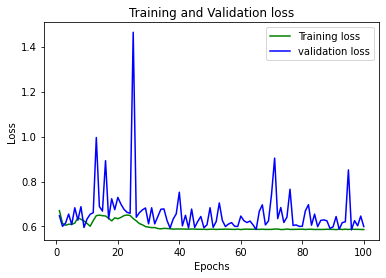

In [25]:
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
loss_train, loss_val, epochs = hist.history['accuracy'], hist.history['val_accuracy'], range(1,101)

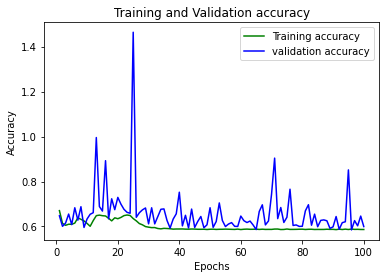

In [28]:
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()